In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
ls "/content/drive/My Drive/Major Project/"

 8th_sem_mproject.ipynb   LeNetBTD.ipynb
 crop_production.csv      Major_Project_LogBook_8th_sem.gsheet
 CYP.ipynb               'VIMLESH KUMAR - Logbook.gsheet'
 data.ipynb               weather_data.csv


In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import array
from numpy import concatenate
import tensorflow as tf
from numpy import newaxis
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import TimeDistributed
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv1D,Conv2D, MaxPooling1D
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

## Rice Crop Production Dataset

In [5]:
path="/content/drive/My Drive/Major Project/crop_production.csv"
dfx=pd.read_csv(path)
dfx

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
dfx.shape

(246091, 7)

In [7]:
rice_df=dfx[dfx['Crop']=='Rice']
rice_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00


In [8]:
rice_df = rice_df.groupby(['State_Name','Crop_Year']).sum().reset_index()
rice_df

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,10881.00,32184.00
1,Andaman and Nicobar Islands,2001,9801.00,27333.00
2,Andaman and Nicobar Islands,2002,10885.00,32111.66
3,Andaman and Nicobar Islands,2003,10561.37,30850.87
4,Andaman and Nicobar Islands,2004,10734.92,29192.23
...,...,...,...,...
508,West Bengal,2010,4944146.00,13389610.00
509,West Bengal,2011,5433700.00,14605766.00
510,West Bengal,2012,5444318.00,14946735.00
511,West Bengal,2013,5513687.00,15376869.00


In [9]:
rice_df.head(20)

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,10881.00,32184.00
1,Andaman and Nicobar Islands,2001,9801.00,27333.00
2,Andaman and Nicobar Islands,2002,10885.00,32111.66
3,Andaman and Nicobar Islands,2003,10561.37,30850.87
4,Andaman and Nicobar Islands,2004,10734.92,29192.23
5,Andaman and Nicobar Islands,2005,8685.47,25883.04
6,Andaman and Nicobar Islands,2006,7776.17,21535.26
7,Andaman and Nicobar Islands,2010,8390.00,23916.00
8,Andhra Pradesh,1997,2565400.00,6436200.00
9,Andhra Pradesh,1998,2780100.00,7687800.00


In [10]:
final_data=rice_df
final_data

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,10881.00,32184.00
1,Andaman and Nicobar Islands,2001,9801.00,27333.00
2,Andaman and Nicobar Islands,2002,10885.00,32111.66
3,Andaman and Nicobar Islands,2003,10561.37,30850.87
4,Andaman and Nicobar Islands,2004,10734.92,29192.23
...,...,...,...,...
508,West Bengal,2010,4944146.00,13389610.00
509,West Bengal,2011,5433700.00,14605766.00
510,West Bengal,2012,5444318.00,14946735.00
511,West Bengal,2013,5513687.00,15376869.00


In [11]:
new_row = {'State_Name':'Delhi', 'Crop_Year':2000, 'Area':6800, 'Production':29000}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2001, 'Area':5800, 'Production':19000}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2002, 'Area':6500, 'Production':23700}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2003, 'Area':6800, 'Production':29000}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2004, 'Area':6900, 'Production':30000}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2005, 'Area':7440, 'Production':31420}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2006, 'Area':7000, 'Production':31000}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2007, 'Area':7400, 'Production':31400}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2008, 'Area':7400, 'Production':31400}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2009, 'Area':6800, 'Production':29000}
final_data=final_data.append(new_row,ignore_index=True)
new_row = {'State_Name':'Delhi', 'Crop_Year':2010, 'Area':7000, 'Production':29400}
final_data=final_data.append(new_row,ignore_index=True)


In [12]:
print(final_data.shape)

(524, 4)


In [13]:
final_data.isnull().sum()

State_Name    0
Crop_Year     0
Area          0
Production    0
dtype: int64

In [14]:
fd = pd.DataFrame(final_data) 
fd.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Delhi'],
      dtype=object)

# Weather Data Set

In [15]:
weather_path="/content/drive/My Drive/Major Project/weather_data.csv"
weather_df=pd.read_csv(weather_path)
weather_df

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,West Bengal,1990.0,37.2,9.7,26.0,48.9,2377.90,42.5,3.9,56.1,77.81
1,West Bengal,1991.0,38.2,10.1,26.2,49.3,1625.60,40.7,3.2,51.4,75.75
2,West Bengal,1992.0,39.4,9.7,26.2,50.3,1839.20,55.4,2.5,46.5,73.55
3,West Bengal,1993.0,39.7,10.2,26.2,49.8,1914.40,92.5,2.3,53.0,75.58
4,West Bengal,1994.0,41.1,9.9,26.2,51.8,1552.00,83.2,2.4,52.1,76.45
...,...,...,...,...,...,...,...,...,...,...,...
885,Mizoram,2016.0,35.1,2.1,26.5,45.5,1791.55,177.0,4.3,58.7,70.81
886,Mizoram,2017.0,35.1,8.1,25.6,47.5,2545.36,176.0,4.8,50.8,71.76
887,Mizoram,2018.0,35.1,10.1,25.2,44.3,1571.98,27.7,4.4,51.9,67.26
888,Mizoram,2019.0,36.1,8.1,26.1,45.5,1753.13,37.1,4.1,59.7,69.31


In [16]:
new_data=weather_df
new_data

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,West Bengal,1990.0,37.2,9.7,26.0,48.9,2377.90,42.5,3.9,56.1,77.81
1,West Bengal,1991.0,38.2,10.1,26.2,49.3,1625.60,40.7,3.2,51.4,75.75
2,West Bengal,1992.0,39.4,9.7,26.2,50.3,1839.20,55.4,2.5,46.5,73.55
3,West Bengal,1993.0,39.7,10.2,26.2,49.8,1914.40,92.5,2.3,53.0,75.58
4,West Bengal,1994.0,41.1,9.9,26.2,51.8,1552.00,83.2,2.4,52.1,76.45
...,...,...,...,...,...,...,...,...,...,...,...
885,Mizoram,2016.0,35.1,2.1,26.5,45.5,1791.55,177.0,4.3,58.7,70.81
886,Mizoram,2017.0,35.1,8.1,25.6,47.5,2545.36,176.0,4.8,50.8,71.76
887,Mizoram,2018.0,35.1,10.1,25.2,44.3,1571.98,27.7,4.4,51.9,67.26
888,Mizoram,2019.0,36.1,8.1,26.1,45.5,1753.13,37.1,4.1,59.7,69.31


In [17]:
new_data["State_Name"].replace({"Gujrat":"Gujarat","Dadra and Nagar Haveli, DN, India":"Dadra and Nagar Haveli","kerala":"Kerala"},inplace=True)

In [18]:
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2000,'Max Temperature': 25.1, 'Min Temperature': 10.3,'Temperature': 13.2,'Heat Index': 23.2,'Precipitation':234.6,'Wind Speed':72.2,'Visibility': 1.9,'Cloud Cover':66.8,'Relative Humidity':81.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2001,'Max Temperature': 24.6, 'Min Temperature': 11.2,'Temperature': 14.8,'Heat Index': 29.3,'Precipitation':197.2,'Wind Speed':74.2,'Visibility': 2.1,'Cloud Cover':71.1,'Relative Humidity':78.8}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2002,'Max Temperature': 24.9, 'Min Temperature': 11.7,'Temperature': 18.4,'Heat Index': 28.6,'Precipitation':332.8,'Wind Speed':78.4,'Visibility': 3.2,'Cloud Cover':55.8,'Relative Humidity':83.4}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2003,'Max Temperature': 23.8, 'Min Temperature': 10.6,'Temperature': 17.3,'Heat Index': 28.9,'Precipitation':343.2,'Wind Speed':67.8,'Visibility': 2.8,'Cloud Cover':67.2,'Relative Humidity':79.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2004,'Max Temperature': 25.5, 'Min Temperature': 9.8,'Temperature': 16.2,'Heat Index': 29.9,'Precipitation':298.4,'Wind Speed':69.0,'Visibility': 3.9,'Cloud Cover':69.0,'Relative Humidity':73.7}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2005,'Max Temperature': 25.1, 'Min Temperature': 12.3,'Temperature': 19.2,'Heat Index': 30.2,'Precipitation':534.2,'Wind Speed':58.6,'Visibility': 4.1,'Cloud Cover':70.7,'Relative Humidity':85.6}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2006,'Max Temperature': 24.3, 'Min Temperature': 12.8,'Temperature': 20.0,'Heat Index': 28.0,'Precipitation':433.5,'Wind Speed':65.5,'Visibility': 5.2,'Cloud Cover':75.2,'Relative Humidity':81.9}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2007,'Max Temperature': 23.1, 'Min Temperature': 11.1,'Temperature': 18.1,'Heat Index': 26.6,'Precipitation':257.7,'Wind Speed':59.0,'Visibility': 2.4,'Cloud Cover':76.5,'Relative Humidity':81.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2008,'Max Temperature': 23.9, 'Min Temperature': 12,'Temperature': 17.8,'Heat Index': 25.9,'Precipitation':288.0,'Wind Speed':75.9,'Visibility': 4.2,'Cloud Cover':68.2,'Relative Humidity':76.4}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2009,'Max Temperature': 24.5, 'Min Temperature': 10.7,'Temperature': 17.1,'Heat Index': 26.7,'Precipitation':380.9,'Wind Speed':74.1,'Visibility': 3.5,'Cloud Cover':66.8,'Relative Humidity':72.3}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Jammu and Kashmir','Crop_Year': 2010,'Max Temperature': 25.3, 'Min Temperature': 9.9,'Temperature': 19.2,'Heat Index': 27.0,'Precipitation':654.3,'Wind Speed':68.8,'Visibility': 2.7,'Cloud Cover':69.1,'Relative Humidity':86.0}
new_data=new_data.append(new_row,ignore_index=True)

In [19]:
new_row={'State_Name': 'Nagaland','Crop_Year': 2000,'Max Temperature': 28.1, 'Min Temperature': 19.3,'Temperature': 23.2,'Heat Index': 38.5,'Precipitation':1634.6,'Wind Speed':72.2,'Visibility': 5.9,'Cloud Cover':66.8,'Relative Humidity':81.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2001,'Max Temperature': 29.6, 'Min Temperature': 20.2,'Temperature': 24.5,'Heat Index': 39.3,'Precipitation':1797.2,'Wind Speed':74.2,'Visibility': 4.1,'Cloud Cover':71.1,'Relative Humidity':78.8}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2002,'Max Temperature': 29.9, 'Min Temperature': 20.7,'Temperature': 24.2,'Heat Index': 38.6,'Precipitation':1332.8,'Wind Speed':78.4,'Visibility': 3.2,'Cloud Cover':55.8,'Relative Humidity':83.4}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2003,'Max Temperature': 28.8, 'Min Temperature': 19.6,'Temperature': 23.2,'Heat Index': 38.9,'Precipitation':1543.2,'Wind Speed':67.8,'Visibility': 5.8,'Cloud Cover':67.2,'Relative Humidity':79.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2004,'Max Temperature': 30.5, 'Min Temperature': 18.8,'Temperature': 26.7,'Heat Index': 39.9,'Precipitation':1698.4,'Wind Speed':69.0,'Visibility': 4.9,'Cloud Cover':69.0,'Relative Humidity':73.7}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2005,'Max Temperature': 30.1, 'Min Temperature': 21.3,'Temperature': 26.3,'Heat Index': 40.2,'Precipitation':2034.2,'Wind Speed':58.6,'Visibility': 6.2,'Cloud Cover':70.7,'Relative Humidity':85.6}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2006,'Max Temperature': 29.3, 'Min Temperature': 22.8,'Temperature': 27.8,'Heat Index': 38.0,'Precipitation':1833.5,'Wind Speed':65.5,'Visibility': 5.2,'Cloud Cover':75.2,'Relative Humidity':81.9}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2007,'Max Temperature': 27.1, 'Min Temperature': 20.1,'Temperature': 25.2,'Heat Index': 36.6,'Precipitation':2257.7,'Wind Speed':59.0,'Visibility': 4.8,'Cloud Cover':76.5,'Relative Humidity':81.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2008,'Max Temperature': 27.9, 'Min Temperature': 22.0,'Temperature': 23.9,'Heat Index': 35.9,'Precipitation':2088.0,'Wind Speed':75.9,'Visibility': 4.8,'Cloud Cover':68.2,'Relative Humidity':76.4}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2009,'Max Temperature': 28.5, 'Min Temperature': 19.7,'Temperature': 25.6,'Heat Index': 36.7,'Precipitation':1780.9,'Wind Speed':74.1,'Visibility': 5.5,'Cloud Cover':66.8,'Relative Humidity':72.3}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Nagaland','Crop_Year': 2010,'Max Temperature': 30.3, 'Min Temperature': 18.9,'Temperature': 28.4,'Heat Index': 37.0,'Precipitation':1654.3,'Wind Speed':68.8,'Visibility': 5.7,'Cloud Cover':69.1,'Relative Humidity':86.0}
new_data=new_data.append(new_row,ignore_index=True)

In [20]:
new_row={'State_Name': 'Chandigarh','Crop_Year': 2000,'Max Temperature': 30.1, 'Min Temperature': 21.3,'Temperature': 25.2,'Heat Index': 34.5,'Precipitation':980.6,'Wind Speed':52.2,'Visibility': 5.9,'Cloud Cover':66.8,'Relative Humidity':71.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2001,'Max Temperature': 31.6, 'Min Temperature': 22.2,'Temperature': 26.5,'Heat Index': 42.3,'Precipitation':1000.2,'Wind Speed':54.2,'Visibility': 5.1,'Cloud Cover':71.1,'Relative Humidity':68.8}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2002,'Max Temperature': 31.9, 'Min Temperature': 22.7,'Temperature': 26.2,'Heat Index': 41.6,'Precipitation':1102.8,'Wind Speed':58.4,'Visibility': 5.2,'Cloud Cover':55.8,'Relative Humidity':73.4}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2003,'Max Temperature': 30.8, 'Min Temperature': 21.6,'Temperature': 25.2,'Heat Index': 41.9,'Precipitation':876.2,'Wind Speed':57.8,'Visibility': 6.8,'Cloud Cover':67.2,'Relative Humidity':69.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2004,'Max Temperature': 32.5, 'Min Temperature': 20.8,'Temperature': 28.7,'Heat Index': 42.9,'Precipitation':902.4,'Wind Speed':59.0,'Visibility': 6.9,'Cloud Cover':69.0,'Relative Humidity':63.7}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2005,'Max Temperature': 32.1, 'Min Temperature': 23.3,'Temperature': 28.3,'Heat Index': 43.2,'Precipitation':1054.2,'Wind Speed':58.6,'Visibility': 6.2,'Cloud Cover':70.7,'Relative Humidity':75.6}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2006,'Max Temperature': 31.3, 'Min Temperature': 24.8,'Temperature': 29.8,'Heat Index': 41.0,'Precipitation':1098.5,'Wind Speed':55.5,'Visibility': 6.2,'Cloud Cover':75.2,'Relative Humidity':71.9}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2007,'Max Temperature': 29.1, 'Min Temperature': 22.1,'Temperature': 27.2,'Heat Index': 39.6,'Precipitation':998.7,'Wind Speed':59.0,'Visibility': 6.8,'Cloud Cover':76.5,'Relative Humidity':71.1}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2008,'Max Temperature': 29.9, 'Min Temperature': 24.0,'Temperature': 25.9,'Heat Index': 38.9,'Precipitation':982.0,'Wind Speed':55.9,'Visibility': 6.8,'Cloud Cover':68.2,'Relative Humidity':66.4}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2009,'Max Temperature': 30.5, 'Min Temperature': 21.7,'Temperature': 27.6,'Heat Index': 39.7,'Precipitation':1002.9,'Wind Speed':54.1,'Visibility': 6.5,'Cloud Cover':66.8,'Relative Humidity':62.3}
new_data=new_data.append(new_row,ignore_index=True)
new_row={'State_Name': 'Chandigarh','Crop_Year': 2010,'Max Temperature': 32.3, 'Min Temperature': 20.9,'Temperature': 30.4,'Heat Index': 40.0,'Precipitation':1201.3,'Wind Speed':58.8,'Visibility': 6.7,'Cloud Cover':69.1,'Relative Humidity':76.0}
new_data=new_data.append(new_row,ignore_index=True)

In [21]:
nd = pd.DataFrame(new_data) 
nd.State_Name.unique()

array(['West Bengal', 'Haryana', 'Andhra Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Uttar Pradesh', 'Himachal Pradesh',
       'Uttarakhand', 'Jharkhand', 'Tripura', 'Karnataka', 'Rajasthan',
       'india', 'Delhi', 'Gujarat', 'Andaman and Nicobar Islands',
       'Arunachal Pradesh', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Kerala', 'Madhya Pradesh', 'Manipur', 'Meghalaya', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Mizoram', '\x1a', 'Jammu and Kashmir', 'Chandigarh'],
      dtype=object)

In [22]:
new_data

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,West Bengal,1990.0,37.2,9.7,26.0,48.9,2377.9,42.5,3.9,56.1,77.81
1,West Bengal,1991.0,38.2,10.1,26.2,49.3,1625.6,40.7,3.2,51.4,75.75
2,West Bengal,1992.0,39.4,9.7,26.2,50.3,1839.2,55.4,2.5,46.5,73.55
3,West Bengal,1993.0,39.7,10.2,26.2,49.8,1914.4,92.5,2.3,53.0,75.58
4,West Bengal,1994.0,41.1,9.9,26.2,51.8,1552.0,83.2,2.4,52.1,76.45
...,...,...,...,...,...,...,...,...,...,...,...
918,Chandigarh,2006.0,31.3,24.8,29.8,41.0,1098.5,55.5,6.2,75.2,71.90
919,Chandigarh,2007.0,29.1,22.1,27.2,39.6,998.7,59.0,6.8,76.5,71.10
920,Chandigarh,2008.0,29.9,24.0,25.9,38.9,982.0,55.9,6.8,68.2,66.40
921,Chandigarh,2009.0,30.5,21.7,27.6,39.7,1002.9,54.1,6.5,66.8,62.30


In [23]:
df=new_data.merge(final_data,how='left',on=['State_Name','Crop_Year'])
df

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Area,Production
0,West Bengal,1990.0,37.2,9.7,26.0,48.9,2377.9,42.5,3.9,56.1,77.81,NaN,NaN
1,West Bengal,1991.0,38.2,10.1,26.2,49.3,1625.6,40.7,3.2,51.4,75.75,NaN,NaN
2,West Bengal,1992.0,39.4,9.7,26.2,50.3,1839.2,55.4,2.5,46.5,73.55,NaN,NaN
3,West Bengal,1993.0,39.7,10.2,26.2,49.8,1914.4,92.5,2.3,53.0,75.58,NaN,NaN
4,West Bengal,1994.0,41.1,9.9,26.2,51.8,1552.0,83.2,2.4,52.1,76.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Chandigarh,2006.0,31.3,24.8,29.8,41.0,1098.5,55.5,6.2,75.2,71.90,50.0,250.0
919,Chandigarh,2007.0,29.1,22.1,27.2,39.6,998.7,59.0,6.8,76.5,71.10,50.0,250.0
920,Chandigarh,2008.0,29.9,24.0,25.9,38.9,982.0,55.9,6.8,68.2,66.40,20.0,100.0
921,Chandigarh,2009.0,30.5,21.7,27.6,39.7,1002.9,54.1,6.5,66.8,62.30,20.0,100.0


In [24]:
df.iloc[190, df.columns.get_loc('Production')] = 208900
df.iloc[191, df.columns.get_loc('Production')] = 142100
df.iloc[192, df.columns.get_loc('Production')] = 126500
df.iloc[193, df.columns.get_loc('Production')] = 134800
df.iloc[250, df.columns.get_loc('Visibility')] = 8.8
df.iloc[259, df.columns.get_loc('Production')] = 118300
df.iloc[308, df.columns.get_loc('Production')] = 1771882
df.iloc[309, df.columns.get_loc('Production')] = 1644700
df.iloc[316, df.columns.get_loc('Production')] = 3336400
df.iloc[317, df.columns.get_loc('Production')] = 3420200
df.iloc[318, df.columns.get_loc('Production')] = 1538400
df.iloc[527, df.columns.get_loc('Production')] = 31000
df.iloc[528, df.columns.get_loc('Production')] = 21900
df.iloc[529, df.columns.get_loc('Production')] = 22100
df.iloc[541, df.columns.get_loc('Visibility')] = 4.7
df.iloc[542, df.columns.get_loc('Visibility')] = 5.1
df.iloc[667, df.columns.get_loc('Production')] = 406200
df.iloc[668, df.columns.get_loc('Production')] = 39700
df.iloc[669, df.columns.get_loc('Production')] = 319941
df.iloc[862, df.columns.get_loc('Production')] = 796416
df.iloc[863, df.columns.get_loc('Production')] = 594719
df.iloc[864, df.columns.get_loc('Production')] = 297610
df.iloc[865, df.columns.get_loc('Production')] = 358144
df.iloc[866, df.columns.get_loc('Production')] = 555128
df.iloc[867, df.columns.get_loc('Production')] = 938666
df.iloc[868, df.columns.get_loc('Production')] = 805904
df.iloc[869, df.columns.get_loc('Production')] = 990000
df.iloc[870, df.columns.get_loc('Production')] = 1150307
df.iloc[871, df.columns.get_loc('Production')] = 918970
df.iloc[872, df.columns.get_loc('Production')] = 1323714
df.iloc[882, df.columns.get_loc('Relative Humidity')] = 73.89
df.iloc[883, df.columns.get_loc('Production')] = 44400
df.iloc[890, df.columns.get_loc('Production')] = 415342
df.iloc[891, df.columns.get_loc('Production')] = 422298
df.iloc[892, df.columns.get_loc('Production')] = 421457
df.iloc[893, df.columns.get_loc('Production')] = 504797
df.iloc[894, df.columns.get_loc('Production')] = 492372
df.iloc[895, df.columns.get_loc('Production')] = 556774
df.iloc[896, df.columns.get_loc('Production')] = 554000
df.iloc[897, df.columns.get_loc('Production')] = 561355
df.iloc[898, df.columns.get_loc('Production')] = 563100
df.iloc[899, df.columns.get_loc('Production')] = 497375
df.iloc[900, df.columns.get_loc('Production')] = 507660
#------------------------------------------------------------------------
df.iloc[190, df.columns.get_loc('Area')] = 59023
df.iloc[191, df.columns.get_loc('Area')] = 57207	
df.iloc[192, df.columns.get_loc('Area')] = 49383
df.iloc[193, df.columns.get_loc('Area')] = 50169
df.iloc[259, df.columns.get_loc('Area')] = 77700
df.iloc[308, df.columns.get_loc('Area')] = 1712400
df.iloc[309, df.columns.get_loc('Area')] = 1693600
df.iloc[316, df.columns.get_loc('Area')] = 1653700
df.iloc[317, df.columns.get_loc('Area')] = 1683600
df.iloc[318, df.columns.get_loc('Area')] = 99500
df.iloc[527, df.columns.get_loc('Area')] = 11000
df.iloc[528, df.columns.get_loc('Area')] = 7300
df.iloc[529, df.columns.get_loc('Area')] = 7900
df.iloc[667, df.columns.get_loc('Area')] = 166100
df.iloc[668, df.columns.get_loc('Area')] = 168400
df.iloc[669, df.columns.get_loc('Area')] = 169400
df.iloc[862, df.columns.get_loc('Area')] = 262301
df.iloc[863, df.columns.get_loc('Area')] = 219587
df.iloc[864, df.columns.get_loc('Area')] = 131668
df.iloc[865, df.columns.get_loc('Area')] = 123008
df.iloc[866, df.columns.get_loc('Area')] = 192692
df.iloc[867, df.columns.get_loc('Area')] = 310697
df.iloc[868, df.columns.get_loc('Area')] = 284276
df.iloc[869, df.columns.get_loc('Area')] = 311000
df.iloc[870, df.columns.get_loc('Area')] = 361812
df.iloc[871, df.columns.get_loc('Area')] = 273430
df.iloc[872, df.columns.get_loc('Area')] = 405315
df.iloc[883, df.columns.get_loc('Area')] = 47200
df.iloc[890, df.columns.get_loc('Area')] = 244051
df.iloc[891, df.columns.get_loc('Area')] = 249830
df.iloc[892, df.columns.get_loc('Area')] = 236199
df.iloc[893, df.columns.get_loc('Area')] = 259815
df.iloc[894, df.columns.get_loc('Area')] = 250044
df.iloc[895, df.columns.get_loc('Area')] = 259014
df.iloc[896, df.columns.get_loc('Area')] = 261094
df.iloc[897, df.columns.get_loc('Area')] = 263246
df.iloc[898, df.columns.get_loc('Area')] = 264490
df.iloc[899, df.columns.get_loc('Area')] = 281002
df.iloc[900, df.columns.get_loc('Area')] = 282021

In [25]:
df

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Area,Production
0,West Bengal,1990.0,37.2,9.7,26.0,48.9,2377.9,42.5,3.9,56.1,77.81,NaN,NaN
1,West Bengal,1991.0,38.2,10.1,26.2,49.3,1625.6,40.7,3.2,51.4,75.75,NaN,NaN
2,West Bengal,1992.0,39.4,9.7,26.2,50.3,1839.2,55.4,2.5,46.5,73.55,NaN,NaN
3,West Bengal,1993.0,39.7,10.2,26.2,49.8,1914.4,92.5,2.3,53.0,75.58,NaN,NaN
4,West Bengal,1994.0,41.1,9.9,26.2,51.8,1552.0,83.2,2.4,52.1,76.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Chandigarh,2006.0,31.3,24.8,29.8,41.0,1098.5,55.5,6.2,75.2,71.90,50.0,250.0
919,Chandigarh,2007.0,29.1,22.1,27.2,39.6,998.7,59.0,6.8,76.5,71.10,50.0,250.0
920,Chandigarh,2008.0,29.9,24.0,25.9,38.9,982.0,55.9,6.8,68.2,66.40,20.0,100.0
921,Chandigarh,2009.0,30.5,21.7,27.6,39.7,1002.9,54.1,6.5,66.8,62.30,20.0,100.0


In [26]:
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2000,'Max Temperature': 29.6, 'Min Temperature': 25.2,'Temperature': 25.2,'Precipitation':0,'Wind Speed':52.2,'Visibility': 4.9,'Cloud Cover':96.8,'Relative Humidity':91.1,'Area':118601,'Production':132690}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2004,'Max Temperature': 30.2, 'Min Temperature': 24.7,'Temperature': 25.3,'Precipitation':0,'Wind Speed':56.9,'Visibility': 4.6,'Cloud Cover':98.8,'Relative Humidity':90.6,'Area':121642,'Production':134950}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2005,'Max Temperature': 28.5, 'Min Temperature': 24.2,'Temperature': 25.6,'Precipitation':0,'Wind Speed':57.2,'Visibility': 4.7,'Cloud Cover':94.8,'Relative Humidity':92.8,'Area':122267,'Production':146191}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2006,'Max Temperature': 29.3, 'Min Temperature': 24.7,'Temperature': 24.7,'Precipitation':0,'Wind Speed':60.9,'Visibility': 4.8,'Cloud Cover':94.2,'Relative Humidity':89.1,'Area':123038,'Production':144635}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2007,'Max Temperature': 30.1, 'Min Temperature': 23.9,'Temperature': 23.9,'Precipitation':0,'Wind Speed':65.2,'Visibility': 5.0,'Cloud Cover':91.0,'Relative Humidity':86.9,'Area':124029,'Production':158146}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2008,'Max Temperature': 29.9, 'Min Temperature': 24.4,'Temperature': 25.0,'Precipitation':0,'Wind Speed':66.9,'Visibility': 5.1,'Cloud Cover':88.8,'Relative Humidity':92.3,'Area':126799,'Production': 164538}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2009,'Max Temperature': 31.4, 'Min Temperature': 22.2,'Temperature': 27.9,'Precipitation':0,'Wind Speed':61.8,'Visibility': 4.4,'Cloud Cover':89.3,'Relative Humidity':90.6,'Area':121468,'Production': 143895}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Arunachal Pradesh','Crop_Year': 2010,'Max Temperature': 28.7, 'Min Temperature': 23.3,'Temperature': 25.8,'Precipitation':0,'Wind Speed':52.9,'Visibility': 4.3,'Cloud Cover':90.1,'Relative Humidity':88.8,'Area':121570,'Production':155993}
df=df.append(new_row,ignore_index=True)
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
new_row={'State_Name': 'Dadra and Nagar Haveli','Crop_Year': 2000,'Max Temperature': 29.8, 'Min Temperature': 28.2,'Temperature': 28.2,'Precipitation':0,'Wind Speed':12.2,'Visibility': 10,'Cloud Cover':36.8,'Relative Humidity':61.1,'Area':10881,'Production':32184}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Dadra and Nagar Haveli','Crop_Year': 2001,'Max Temperature': 30.6, 'Min Temperature': 29.0,'Temperature': 29.0,'Precipitation':0,'Wind Speed':22.2,'Visibility': 10,'Cloud Cover':32.8,'Relative Humidity':59.4,'Area':9801,'Production':27333}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Dadra and Nagar Haveli','Crop_Year': 2004,'Max Temperature': 30.2, 'Min Temperature': 27.8,'Temperature': 27.8,'Precipitation':0,'Wind Speed':15.2,'Visibility': 10,'Cloud Cover':33.8,'Relative Humidity':63.9,'Area':10734.9,'Production':29192.2}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Dadra and Nagar Haveli','Crop_Year': 2006,'Max Temperature': 31.3, 'Min Temperature': 28.0,'Temperature': 28.0,'Precipitation':0,'Wind Speed':18.8,'Visibility': 10,'Cloud Cover':30.1,'Relative Humidity':62.3,'Area':7776.17,'Production':21535.3}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Dadra and Nagar Haveli','Crop_Year': 2008,'Max Temperature': 32.1, 'Min Temperature': 27.7,'Temperature': 27.7,'Precipitation':0,'Wind Speed':23.3,'Visibility': 10,'Cloud Cover':27.6,'Relative Humidity':64.7,'Area':7300,'Production':21900}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Dadra and Nagar Haveli','Crop_Year': 2010,'Max Temperature': 32.0, 'Min Temperature': 28.2,'Temperature': 28.2,'Precipitation':0,'Wind Speed':20.2,'Visibility': 10,'Cloud Cover':22.0,'Relative Humidity':55.3,'Area':8390,'Production': 23916}
df=df.append(new_row,ignore_index=True)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
new_row={'State_Name': 'Punjab','Crop_Year': 2000,'Max Temperature': 20.8, 'Min Temperature': 17.2,'Temperature': 18.2,'Precipitation':0,'Wind Speed':12.2,'Visibility': 6,'Cloud Cover':86.8,'Relative Humidity':61.1,'Area':2611000,'Production':9154000}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Punjab','Crop_Year': 2001,'Max Temperature': 21.6, 'Min Temperature': 19.0,'Temperature': 19.0,'Precipitation':0,'Wind Speed':22.2,'Visibility': 8,'Cloud Cover':82.8,'Relative Humidity':59.4,'Area':2487000,'Production':8816000}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Punjab','Crop_Year': 2004,'Max Temperature': 21.2, 'Min Temperature': 17.8,'Temperature': 17.8,'Precipitation':0,'Wind Speed':15.2,'Visibility': 7,'Cloud Cover':83.8,'Relative Humidity':63.9,'Area':2800000,'Production':10437000}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Punjab','Crop_Year': 2006,'Max Temperature': 22.3, 'Min Temperature': 18.0,'Temperature': 18.0,'Precipitation':0,'Wind Speed':18.8,'Visibility': 8,'Cloud Cover':80.1,'Relative Humidity':62.3,'Area':2621000,'Production':10138000}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Punjab','Crop_Year': 2007,'Max Temperature': 23.1, 'Min Temperature': 17.7,'Temperature': 17.7,'Precipitation':0,'Wind Speed':23.3,'Visibility': 8,'Cloud Cover':87.6,'Relative Humidity':64.7,'Area':2610000,'Production':10489000}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Punjab','Crop_Year': 2008,'Max Temperature': 23.0, 'Min Temperature': 18.2,'Temperature': 18.2,'Precipitation':0,'Wind Speed':20.2,'Visibility': 9,'Cloud Cover':82.0,'Relative Humidity':55.3,'Area':2735000,'Production': 11000000}
df=df.append(new_row,ignore_index=True)
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
new_row={'State_Name': 'Mizoram','Crop_Year': 2000,'Max Temperature': 30.8, 'Min Temperature': 27.2,'Temperature': 28.2,'Precipitation':0,'Wind Speed':12.2,'Visibility': 6,'Cloud Cover':86.8,'Relative Humidity':71.1,'Area':50080,'Production':103700}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2001,'Max Temperature': 31.6, 'Min Temperature': 29.0,'Temperature': 29.0,'Precipitation':0,'Wind Speed':22.2,'Visibility': 6,'Cloud Cover':72.8,'Relative Humidity':69.4,'Area':52600,'Production':105700}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2002,'Max Temperature': 31.2, 'Min Temperature': 27.8,'Temperature': 27.8,'Precipitation':0,'Wind Speed':15.2,'Visibility': 5,'Cloud Cover':73.8,'Relative Humidity':73.9,'Area':52100,'Production':109200}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2004,'Max Temperature': 32.3, 'Min Temperature': 28.0,'Temperature': 28.0,'Precipitation':0,'Wind Speed':18.8,'Visibility': 5,'Cloud Cover':60.1,'Relative Humidity':72.3,'Area':51800,'Production':104100}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2005,'Max Temperature': 33.1, 'Min Temperature': 27.7,'Temperature': 27.7,'Precipitation':0,'Wind Speed':23.3,'Visibility': 4.8,'Cloud Cover':67.6,'Relative Humidity':74.7,'Area':52000,'Production':99200}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2006,'Max Temperature': 33.0, 'Min Temperature': 28.2,'Temperature': 28.2,'Precipitation':0,'Wind Speed':20.2,'Visibility': 4.4,'Cloud Cover':72.0,'Relative Humidity':65.3,'Area':53000,'Production':29500 }
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2007,'Max Temperature': 30.8, 'Min Temperature': 27.2,'Temperature': 28.2,'Precipitation':0,'Wind Speed':12.2,'Visibility': 5.2,'Cloud Cover':76.8,'Relative Humidity':71.1,'Area':54600,'Production':15700}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2008,'Max Temperature': 31.6, 'Min Temperature': 29.0,'Temperature': 29.0,'Precipitation':0,'Wind Speed':22.2,'Visibility': 5.8,'Cloud Cover':62.8,'Relative Humidity':69.4,'Area':52000,'Production':46000}
df=df.append(new_row,ignore_index=True)
new_row={'State_Name': 'Mizoram','Crop_Year': 2009,'Max Temperature': 31.2, 'Min Temperature': 27.8,'Temperature': 27.8,'Precipitation':0,'Wind Speed':15.2,'Visibility': 6.7,'Cloud Cover':63.8,'Relative Humidity':73.9,'Area':472000,'Production':44300}
df=df.append(new_row,ignore_index=True)

In [27]:
is_Nan = df.isnull()
row_has_Nan = is_Nan.any(axis=1)
rows_with_Nan = df[row_has_Nan]
rows_with_Nan

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Area,Production
0,West Bengal,1990.0,37.2,9.7,26.0,48.9,2377.9,42.5,3.9,56.1,77.81,NaN,NaN
1,West Bengal,1991.0,38.2,10.1,26.2,49.3,1625.6,40.7,3.2,51.4,75.75,NaN,NaN
2,West Bengal,1992.0,39.4,9.7,26.2,50.3,1839.2,55.4,2.5,46.5,73.55,NaN,NaN
3,West Bengal,1993.0,39.7,10.2,26.2,49.8,1914.4,92.5,2.3,53.0,75.58,NaN,NaN
4,West Bengal,1994.0,41.1,9.9,26.2,51.8,1552.0,83.2,2.4,52.1,76.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,Mizoram,2005.0,33.1,27.7,27.7,NaN,0.0,23.3,4.8,67.6,74.70,52000.0,99200.0
948,Mizoram,2006.0,33.0,28.2,28.2,NaN,0.0,20.2,4.4,72.0,65.30,53000.0,29500.0
949,Mizoram,2007.0,30.8,27.2,28.2,NaN,0.0,12.2,5.2,76.8,71.10,54600.0,15700.0
950,Mizoram,2008.0,31.6,29.0,29.0,NaN,0.0,22.2,5.8,62.8,69.40,52000.0,46000.0


In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

State_Name           0
Crop_Year            0
Max Temperature      0
Min Temperature      0
Temperature          0
Heat Index           0
Precipitation        0
Wind Speed           0
Visibility           0
Cloud Cover          0
Relative Humidity    0
Area                 0
Production           0
dtype: int64

In [30]:
df

,State_Name,Crop_Year,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Area,Production
7,West Bengal,1997.0,40.1,9.1,26.2,54.1,146.2,37.1,3.2,49.3,75.91,5900278.0,13236590.0
8,West Bengal,1998.0,42.1,8.7,27.1,55.1,2087.7,81.4,2.5,59.9,78.74,5904095.0,13316452.0
9,West Bengal,1999.0,40.1,10.1,27.1,52.8,2851.0,79.6,2.4,55.2,76.84,6150439.0,13759680.0
10,West Bengal,2000.0,37.4,0.1,26.8,56.5,3456.2,37.1,2.4,54.1,75.99,5435323.0,12428038.0
11,West Bengal,2001.0,38.6,0.1,26.1,49.6,5961.1,74.2,3.5,50.8,73.38,5503087.0,13815548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Chandigarh,2006.0,31.3,24.8,29.8,41.0,1098.5,55.5,6.2,75.2,71.90,50.0,250.0
919,Chandigarh,2007.0,29.1,22.1,27.2,39.6,998.7,59.0,6.8,76.5,71.10,50.0,250.0
920,Chandigarh,2008.0,29.9,24.0,25.9,38.9,982.0,55.9,6.8,68.2,66.40,20.0,100.0
921,Chandigarh,2009.0,30.5,21.7,27.6,39.7,1002.9,54.1,6.5,66.8,62.30,20.0,100.0


# Uttar Pradesh

In [31]:
df_up=df[df['State_Name']=='Uttar Pradesh']
df_up=df_up[['Max Temperature','Min Temperature','Temperature','Heat Index','Precipitation','Wind Speed','Visibility','Cloud Cover','Relative Humidity','Area','Production']]

In [32]:
df_up

,Max Temperature,Min Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Area,Production
217,43.1,5.1,24.0,52.7,7.70,74.2,4.0,49.8,67.65,5441983.0,11677947.0
218,45.1,5.1,24.9,51.8,67.00,64.8,3.8,42.9,69.81,5575729.0,10826635.0
219,45.1,4.1,25.3,56.8,373.60,55.4,3.4,39.0,66.72,5781768.0,12632709.0
220,43.1,6.1,24.7,55.1,618.30,36.0,3.7,34.2,67.68,5907151.0,11679149.0
221,44.1,4.1,25.0,53.1,499.80,42.5,5.4,34.8,66.18,6071325.0,12855857.0
222,44.1,5.1,25.2,52.4,165.40,37.1,3.8,26.4,61.23,5213429.0,9596346.0
223,45.1,4.1,26.0,54.5,727.10,33.5,3.7,42.4,67.45,5727772.0,12494939.0
224,44.1,4.1,25.7,56.5,694.50,37.1,3.6,37.0,68.60,5934405.0,10749989.0
225,46.1,4.1,25.7,56.5,969.00,79.6,4.5,39.7,63.00,5571524.0,11119095.0
226,42.1,4.1,25.9,52.7,882.60,44.3,4.3,37.4,65.76,5920752.0,11123613.0


In [33]:
df_up.columns=['Max Temperature','Min Temperature','Temperature','Heat Index','Precipitation','Wind Speed','Visibility','Cloud Cover','Relative Humidity','Area','Production']
n_columns=11
values = df_up.values
print(values[:,0])

[43.1 45.1 45.1 43.1 44.1 44.1 45.1 44.1 46.1 42.1 44.1 43.1 45.1 45.1
 43.1 45.1 43.1 48.1]


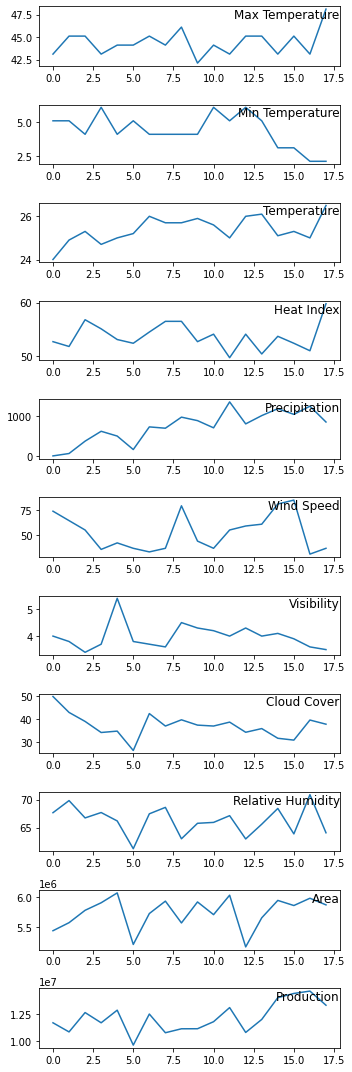

In [34]:
plt.figure(figsize=(5, 15))
for i in range(n_columns):
  plt.subplot(n_columns, 1, i+1)
  plt.plot(values[:,i])
  plt.title(df_up.columns[i],y=.7,loc='right')
plt.tight_layout()
plt.show()

In [35]:
print(df_up)

     Max Temperature  Min Temperature  ...       Area  Production
217             43.1              5.1  ...  5441983.0  11677947.0
218             45.1              5.1  ...  5575729.0  10826635.0
219             45.1              4.1  ...  5781768.0  12632709.0
220             43.1              6.1  ...  5907151.0  11679149.0
221             44.1              4.1  ...  6071325.0  12855857.0
222             44.1              5.1  ...  5213429.0   9596346.0
223             45.1              4.1  ...  5727772.0  12494939.0
224             44.1              4.1  ...  5934405.0  10749989.0
225             46.1              4.1  ...  5571524.0  11119095.0
226             42.1              4.1  ...  5920752.0  11123613.0
227             44.1              6.1  ...  5709388.0  11780112.0
228             43.1              5.1  ...  6033382.0  13097031.0
229             45.1              6.1  ...  5172741.0  10776504.0
230             45.1              5.1  ...  5657070.0  11992299.0
231       

In [36]:
print(df_up.shape)

(18, 11)


In [37]:
df_up=df_up.to_numpy()
x=df_up[:,0:10]
print(x.shape)
print(x)
y=df_up[:,9]
print(y.shape)
print(y)


(18, 10)
[[4.310000e+01 5.100000e+00 2.400000e+01 5.270000e+01 7.700000e+00
  7.420000e+01 4.000000e+00 4.980000e+01 6.765000e+01 5.441983e+06]
 [4.510000e+01 5.100000e+00 2.490000e+01 5.180000e+01 6.700000e+01
  6.480000e+01 3.800000e+00 4.290000e+01 6.981000e+01 5.575729e+06]
 [4.510000e+01 4.100000e+00 2.530000e+01 5.680000e+01 3.736000e+02
  5.540000e+01 3.400000e+00 3.900000e+01 6.672000e+01 5.781768e+06]
 [4.310000e+01 6.100000e+00 2.470000e+01 5.510000e+01 6.183000e+02
  3.600000e+01 3.700000e+00 3.420000e+01 6.768000e+01 5.907151e+06]
 [4.410000e+01 4.100000e+00 2.500000e+01 5.310000e+01 4.998000e+02
  4.250000e+01 5.400000e+00 3.480000e+01 6.618000e+01 6.071325e+06]
 [4.410000e+01 5.100000e+00 2.520000e+01 5.240000e+01 1.654000e+02
  3.710000e+01 3.800000e+00 2.640000e+01 6.123000e+01 5.213429e+06]
 [4.510000e+01 4.100000e+00 2.600000e+01 5.450000e+01 7.271000e+02
  3.350000e+01 3.700000e+00 4.240000e+01 6.745000e+01 5.727772e+06]
 [4.410000e+01 4.100000e+00 2.570000e+01 5.650

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14, 10)
(14,)
(4, 10)
(4,)


## CNN

In [39]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
print(x_train.shape)

(14, 10, 1)


In [40]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(10,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 64)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                12850     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 13,093
Trainable params: 13,093
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 1s 777ms/step - loss: 33999118401536.0000
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 33998195654656.0000
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 33997270810624.0000
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 33996343869440.0000
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 33995402248192.0000
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 33994454335488.0000
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 33993495937024.0000
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 33992529149952.0000
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 33991545585664.0000
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 33990545244160.0000
Epoch 11/200
1/1 [==============================] - 0s 5ms/step - loss: 3398953022259

In [42]:
test_input = array([48.1,2.1,26.5,59.8,848.20,37.1,3.5,37.8,64.07,5871976.0])
#13316967.0
print(test_input.shape)
test_input=test_input.reshape(1,10,1)
print(test_input.shape)

(10,)
(1, 10, 1)


In [43]:
test_output = model.predict(test_input)
print(test_output)

[[291505.66]]


## CNN-LSTM

In [44]:
x_train = x_train.reshape((x_train.shape[0], 2, 5, 1))
x_test = x_test.reshape((x_test.shape[0], 2, 5, 1))
print(x_train.shape)
print(x_test.shape)

(14, 2, 5, 1)
(4, 2, 5, 1)


In [45]:
clmodel = Sequential()
clmodel.add(TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'), input_shape=(None, 5, 1)))
clmodel.add(TimeDistributed(MaxPooling1D(pool_size=2)))
clmodel.add(TimeDistributed(Flatten()))
clmodel.add(LSTM(50, activation='relu'))
clmodel.add(Dense(1))
clmodel.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
print(clmodel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 4, 64)       192       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 2, 64)       0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                35800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 36,043
Trainable params: 36,043
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
clmodel.fit(x_train, y_train, epochs=5000, verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 [==============================] - 0s 13ms/step - loss: 144786.8906 - root_mean_squared_error: 380.5087
Epoch 2502/5000
1/1 [==============================] - 0s 13ms/step - loss: 144869.9531 - root_mean_squared_error: 380.6179
Epoch 2503/5000
1/1 [==============================] - 0s 14ms/step - loss: 144792.3281 - root_mean_squared_error: 380.5159
Epoch 2504/5000
1/1 [==============================] - 0s 12ms/step - loss: 144769.9844 - root_mean_squared_error: 380.4865
Epoch 2505/5000
1/1 [==============================] - 0s 21ms/step - loss: 144803.0938 - root_mean_squared_error: 380.5300
Epoch 2506/5000
1/1 [==============================] - 0s 16ms/step - loss: 144751.9844 - root_mean_squared_error: 380.4629
Epoch 2507/5000
1/1 [==============================] - 0s 8ms/step - loss: 144847.6094 - root_mean_squared_error: 380.5885
Epoch 2508/5000
1/1 [==============================] - 0s 10ms/step - loss: 144738

In [47]:
result=clmodel.evaluate(x_test,y_test,verbose=1)
print(result)

1/1 [==============================] - 1s 853ms/step - loss: 623512.1875 - root_mean_squared_error: 789.6279
[623512.1875, 789.6278686523438]


In [48]:
cl_pred=clmodel.predict(x_test)
cl_pred=cl_pred.reshape(4,)
print("Predicted")
print(cl_pred)
print("\nReal")
print(y_test)

Predicted
[5441026.5 5574771.  5571752.5 5212648.5]

Real
[5441983. 5575729. 5571524. 5213429.]


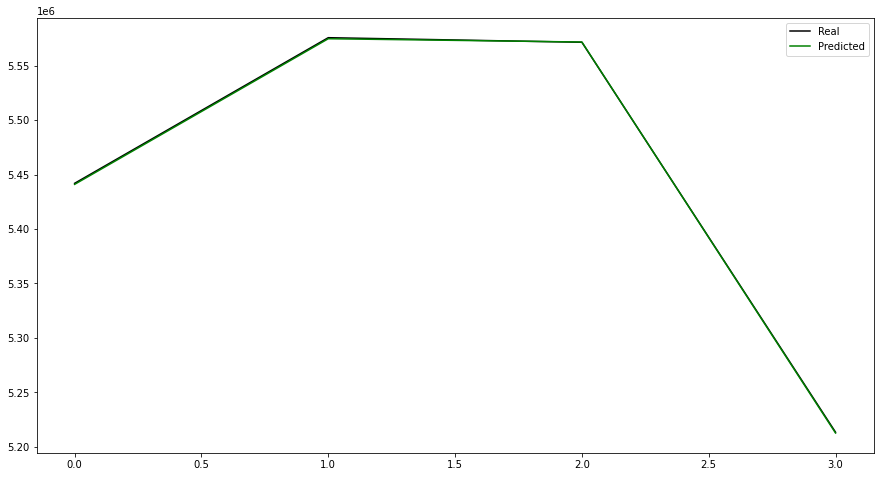

In [49]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color = 'black', label = 'Real')
plt.plot(cl_pred, color = 'green', label = 'Predicted')
plt.legend()
plt.show()

# Saving the Model

In [50]:
upmodel_json=clmodel.to_json()
with open("upmodel.json","w") as json_file:
  json_file.write(upmodel_json)
model.save_weights("upmodel.h5")